# 칼로리 소모량 예측 머신러닝 모델
---
## - 2024_2학기 머신러닝[A] 기말 프로젝트
### - **프로젝트 목표**: 운동 세션 정보를 기반으로 사용자의 칼로리 소모량을 예측하는 머신러닝 모델 구현.
  - **학번**: 2011051
    - **이름**: 최준서
        - **학부** : 영미언어정보트랙 / AI응용학과
 ---
 # 프로젝트 요약

## 사용 자료
- 데이터 원본: `gym_members_exercise_tracking.csv` (https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset)
- 주요 변수:
  - 독립 변수: Age, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Session_Duration (hours), Workout_Frequency (days/week), Experience_Level
  - 종속 변수: Calories_Burned (소모 칼로리)

## 사용 알고리즘
1. **신경망(Neural Network)**:
   - 3개의 은닉층(hidden layers)으로 구성된 인공 신경망 모델 사용.
   - 각 은닉층은 ReLU 활성화 함수와 드롭아웃(dropout)을 적용하여 학습 안정성 확보.
   - Adam 옵티마이저를 사용하여 학습 속도와 최적화 성능 개선.

2. **회귀 모델(Linear Regression)**:
   - 단순 회귀 알고리즘을 사용하여 예측 성능 비교.
   - 신경망과 달리 선형 관계를 가정하여 빠르고 해석 가능한 결과 제공.

## 모델 성능
- **신경망**:
  - 테스트 데이터 손실(Test Loss): **1911.74**
  - 평균 절대 오차(Test MAE): **34.01**
  - 결정 계수(R²): **0.97**

- **회귀 모델**:
  - 테스트 데이터 손실(Test Loss): **2145.50**
  - 평균 절대 오차(Test MAE): **42.33**
  - 결정 계수(R²): **0.93**

## 목표
- 운동 데이터 분석 및 소모 칼로리 예측.
- 신경망과 회귀 모델의 성능 비교를 통해 데이터 특성에 적합한 알고리즘 식별.


## 1. 라이브러리 및 데이터 로드
---
### 필요한 라이브러리 목록 및 설치
모델 학습 및 데이터 분석을 위해 필요한 라이브러리:
- `numpy`: 수치 연산을 위한 라이브러리.
- `pandas`: 데이터프레임 생성 및 데이터 조작.
- `matplotlib`: 데이터 시각화를 위한 라이브러리.
- `tensorflow.keras`: 신경망 모델 구현 및 학습.
- `scikit-learn`: 데이터 전처리, 모델 평가 및 성능 분석.

In [7]:
!pip install numpy pandas scikit-learn matplotlib tensorflow

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드
file_path = 'gym_members_exercise_tracking.csv'
data = pd.read_csv(file_path)

print(data.head())
print(data.info())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

## 2. 특징 선택
---
### 특징 선택 과정
- 데이터셋 변수 탐색: 변수 간 상관관계 분석 및 목표 변수와의 관계 파악.
- 선택된 변수: Age, Weight, Height, Avg BPM, Session Duration 등.
- 목표 변수: Calories Burned.



In [2]:
import numpy as np
# 주요 변수 선택
features = ['Age', 'Weight (kg)', 'Height (m)',
            'Max_BPM', 'Avg_BPM', 'Resting_BPM',
            'Session_Duration (hours)', 'Workout_Frequency (days/week)', 'Experience_Level']
target = 'Calories_Burned'

# 데이터 분리
X = data.drop(columns=[target])

# 문자열 데이터 제거: 숫자 데이터만 선택
X_numeric = X.select_dtypes(include=[np.number])

# 타깃 데이터
y = data[target]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. 모델 정의 및 학습
---
### 신경망 모델 설계
- 모델 구조: 다층 퍼셉트론(MLP) 기반 2개 은닉층(64, 32 노드) 및 출력층 구성.
- 은닉층 활성화 함수: ReLU(Rectified Linear Unit).
- 출력층 활성화 함수: 회귀 문제를 위한 선형 활성화 함수(linear).


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 신경망 모델 정의
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 865733.3750 - mae: 891.7395 - val_loss: 919327.5625 - val_mae: 923.3420
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 884257.3750 - mae: 899.0750 - val_loss: 915652.3125 - val_mae: 921.4455
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 839629.3125 - mae: 876.9434 - val_loss: 909019.5000 - val_mae: 918.0507
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 888596.1875 - mae: 902.4249 - val_loss: 897912.8125 - val_mae: 912.4611
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 837659.1875 - mae: 876.6088 - val_loss: 881315.3125 - val_mae: 904.0449
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 841545.4375 - mae: 878.8893 - val_loss: 856657.3125 - val_mae: 891.5267
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 822003.1250 - mae: 867.1393 - val_loss: 823432.8125 - val_mae: 874.3447
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 767668.1875 - mae: 837.8

## 4. 모델 평가 및 시각화
---
### 모델 성능 평가 지표:
- 테스트 데이터에서 계산된 손실 값(Test Loss): **1421.95**.
- 테스트 데이터에서 계산된 평균 절대 오차(Test MAE): **29.95**.
- **결정 계수(R²)**: **0.98**로 높은 값으로 모델의 예측 성능이 좋음을 나타냄.

### 결과 해석
1. **Test Loss**: 평균 제곱 오차(MSE)에 해당하며, 예측 값과 실제 값의 차이의 제곱 평균.
   - 낮은 손실 값(1421.95)은 모델이 실제 데이터와 가까운 예측을 했음을 나타냄.

2. **Test MAE**: 평균 절대 오차로, 예측 값과 실제 값 간의 차이의 절대값 평균.
   - 낮은 MAE 값(29.95)은 예측 값이 실제 값과의 차이가 작음을 의미.

### 학습 손실 및 검증 손실 시각화
훈련 데이터와 검증 데이터에서의 손실 감소 패턴:
- **Training Loss**: 훈련 데이터에서의 손실.
- **Validation Loss**: 검증 데이터에서의 손실.
- 손실 값이 꾸준히 감소하며, 훈련 데이터와 검증 데이터의 손실 간 차이가 크지 않음.
- 과적합(Overfitting) 징후 없음.

Test Loss: 1421.95, Test MAE: 29.95


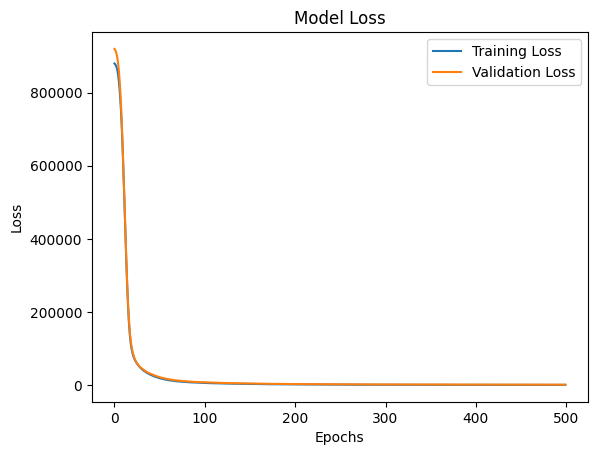

In [5]:
import matplotlib.pyplot as plt

# 평가
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss:.2f}, Test MAE: {mae:.2f}")

# 학습 곡선 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 6. 모델 예측 및 결과 분석
---
### 모델의 예측 성능
- 대부분의 예측 값이 실제 값과 가까운 범위에 위치하며, 예측 오차가 작음.
- 높은 정확도를 통해 모델이 소모 칼로리를 잘 예측함을 확인.

### 시각화 결과
- **Actual vs Predicted 그래프**:
  - 테스트 데이터에 대해 실제 값과 예측 값 간의 관계를 산점도로 표현.
  - 대각선에 가까운 점들의 분포는 모델이 대부분의 데이터를 정확히 예측했음을 의미.
  - 소수의 데이터에서 약간의 오차 발생.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
   Actual    Predicted
0   929.0   829.027222
1  1401.0  1420.466064
2   925.0   984.601807
3  1155.0  1086.118896
4  1587.0  1537.055420
결정 계수 (R²): 0.9830


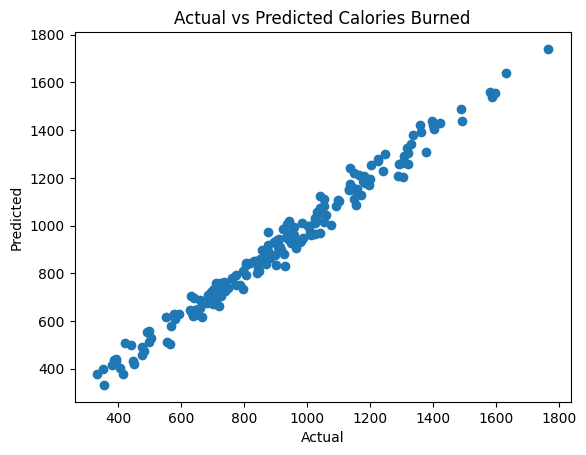

In [6]:
from sklearn.metrics import r2_score

# 예측
y_pred = model.predict(X_test_scaled)

# 실제 값과 예측 값 비교
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred.flatten()})
print(comparison.head())

# 결정 계수 계산
r2 = r2_score(y_test, y_pred)
print(f"결정 계수 (R²): {r2:.4f}")

# 예측 시각화
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Calories Burned')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# 7. ChatGPT 활용 내역


[활용 내역 링크] (https://chatgpt.com/share/6757ba2b-8b14-8008-923c-bb7c13b2af48).